# Linear regression
In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables
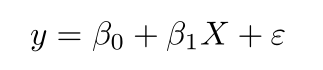

**y** is the predicted value of the dependent variable (y) for any given value of the independent variable (x).

**B0** is the intercept, the predicted value of y when the x is 0.

**B1** is the regression coefficient – how much we expect y to change as x increases.

**x** is the independent variable ( the variable we expect is influencing y).

**e** is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

For identifying a link between two continuous variables, simple linear regression is appropriate. The predictor or independent variable is one, while the response or dependent variable is the other. It searches for statistical relationships rather than deterministic ones. If one variable can be precisely described by the other, the relationship between the two variables is said to be deterministic. It is possible to precisely forecast Fahrenheit using temperature in degrees Celsius, for example. In identifying the link between two variables, statistical relationships are not correct. For instance, consider the link between height and weight. The main goal is to choose a line that fits the data the best. The best fit line is the one with the smallest overall prediction error (across all data points). The gap between the point and the regression line is called error.

Linear regression is used to predict the value of a dependent variable (y) based on the value of an independent variable (x). As a result of this regression approach, a linear connection between x (input) and y (output) is discovered (output). As a result, the term Linear Regression was coined.
In the diagram above, X (input) represents job experience and Y (output) represents a person's wage. For our model, the regression line is the best fit line.
## Formulation
Given a data set $\{y_{i},\,x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}$. A linear regression model assumes that the relationship between the dependent variable y and the p-vector of regressors x is linear. Thus the model takes the form $ y_{i}=\beta _{0}+\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\mathsf {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad i=1,\ldots ,n$

## Algorithm
While training the model we are given :

**x:** input training data (univariate – one input variable(parameter))
**y:** labels to data (supervised learning)

The model gets the best regression fit line by finding the best θ1 and θ2 values. **θ1**: intercept
**θ2**: coefficient of x

How to update θ1 and θ2 values to get the best fit line：

The model seeks to predict y value in such a way that the error difference between predicted and real value is as little as possible by reaching the best-fit regression line. As a result, it is critical to update the 1 and 2 values in order to find the ideal value that minimizes the difference between the predicted y value (pred) and the real y value (y).
## Least-Squares Regression
The least-squares approach is the most frequent method for fitting a regression line. By reducing the sum of the squares of the vertical deviations from each data point to the line, this approach determines the best-fitting line for the observed data (if a point lies on the fitted line exactly, then its vertical deviation is 0). There are no cancellations between positive and negative numbers since the deviations are squared first and then summed.
## Data Set
The penguin dataset consists of 7 columns.

**species**: penguin species (Chinstrap, Adélie, or Gentoo)

**culmen_length_mm**: culmen length (mm)

**culmen_depth_mm**: culmen depth (mm)

**flipper_length_mm**: flipper length (mm)

**body_mass_g**: body mass (g)

**island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

**sex**: penguin sex

**Culmen length & depth?** The culmen is "the upper ridge of a bird's beak"
**What are flippers?** Penguins wings are called flippers.

Run the following code  to load the penguin dataset and visualize the data.

## Linear Regression Single Neuron Model
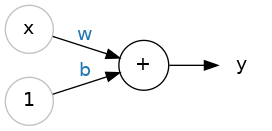
he input is x. Its connection to the neuron has a weight which is w. For the input x, what reaches the neuron is w * x. The b is a special kind of weight we call the bias. The y is the value the neuron ultimately outputs. The neuron's activation is y = w * x + b. Here inputs are "Culmen Length (mm)" and "Body Mass (g)".

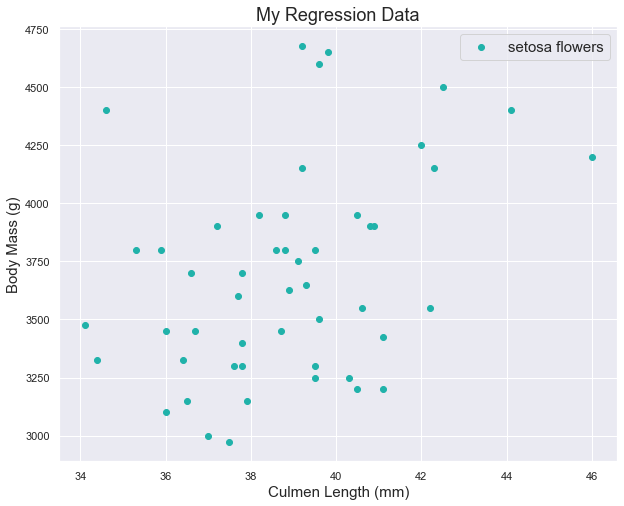

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("penguins_lter.csv")
df = df.iloc[:50][["Culmen Length (mm)", "Body Mass (g)"]]
plt.figure(figsize = (10, 8))
plt.scatter(df['Culmen Length (mm)'], 
            df['Body Mass (g)'], 
            color = "lightseagreen",
            label = "setosa flowers")
plt.xlabel("Culmen Length (mm)", fontsize = 15)
plt.ylabel("Body Mass (g)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

### Algorithm
* Attributes

    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 
       
* Methods
 
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
 

In [2]:
class SingleNeuron(object):

    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [27]:
X = df['Culmen Length (mm)'].values
X = X.reshape(-1, 1)
y = df['Body Mass (g)'].values

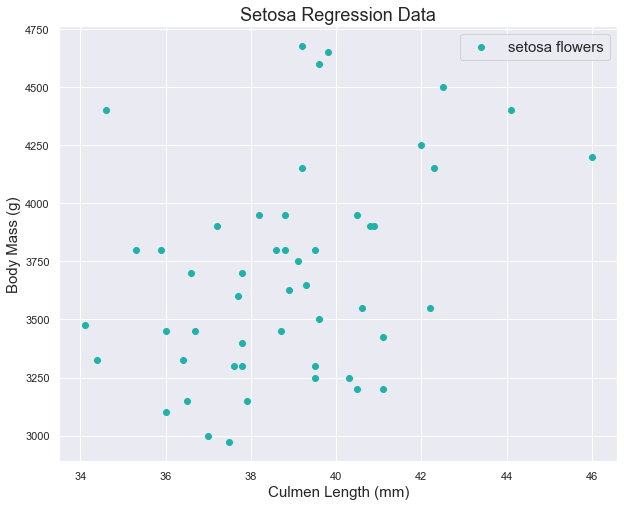

In [28]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.xlabel('Culmen Length (mm)', fontsize = 15)
plt.ylabel('Body Mass (g)', fontsize = 15)
plt.title("Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

### Creating and Training an Instance of the SingleNeuron Class

In [29]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

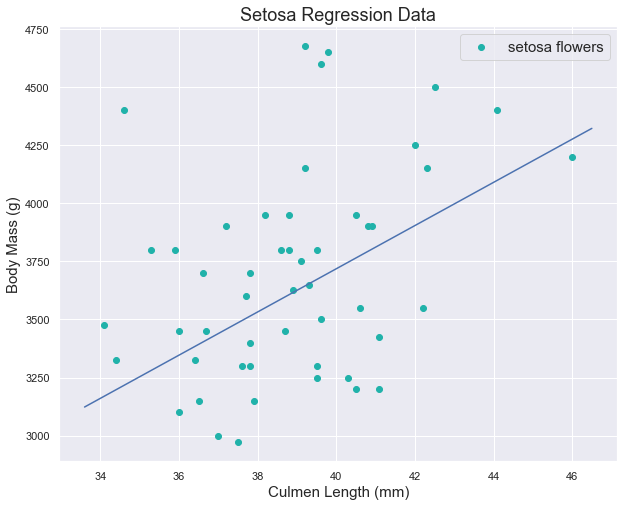

In [30]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel('Culmen Length (mm)', fontsize = 15)
plt.ylabel('Body Mass (g)', fontsize = 15)
plt.title("Setosa Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

**The line generated by our custom SingleNeuron class surely is not random. We verify this by plotting the errors_ attribute to see if the mean sqaured error is decreasing after each epoch we are on the right track. We can visualize the mean-sqaured error at each epoch of our training process**

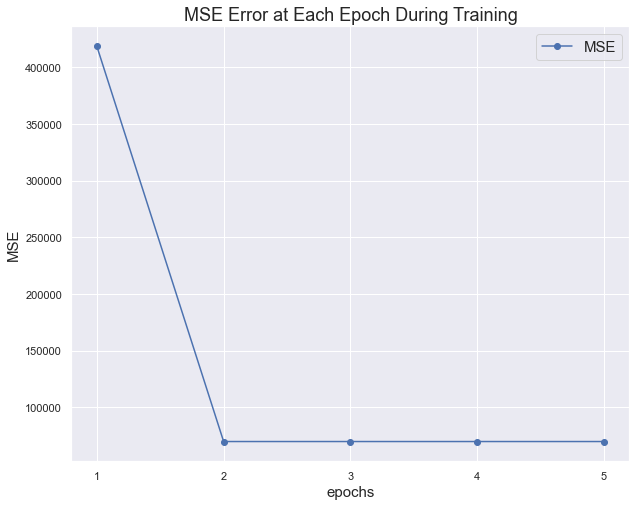

In [31]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

#### Visualize your Errors over each Epoch
 The mean sqaured error is decreasing after the first epoch which means that our single neuron might not be learning.

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

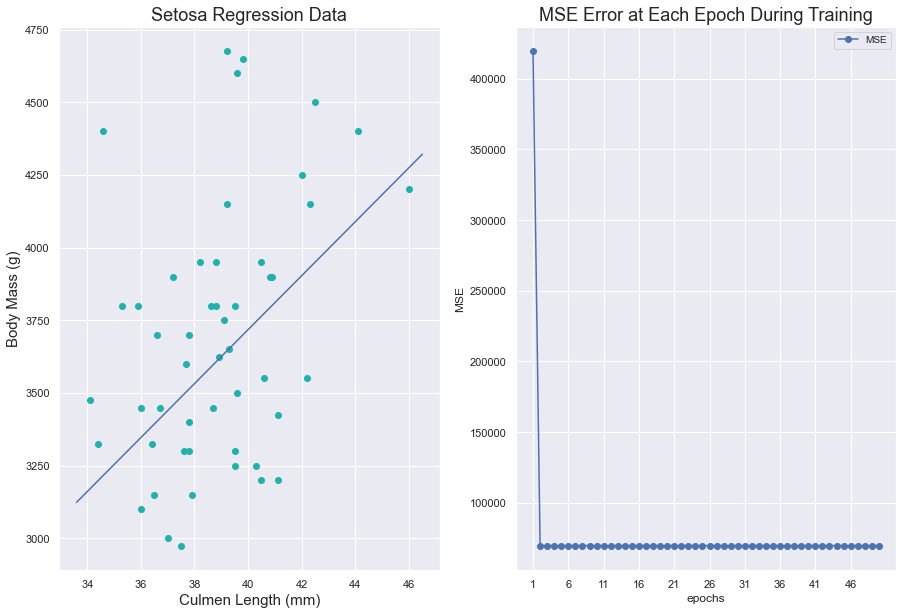

In [32]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel('Culmen Length (mm)', fontsize = 15)
ax1.set_ylabel('Body Mass (g)', fontsize = 15)
ax1.set_title("Setosa Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

###  Experiment with the Learning Rate
Choice of learning rate is important. If learning rate is too large, gradient descent can inadvertently increase. When the learning rate is too small, training is not only slower. However, our plots show that there are not significantly difference between these learning rates.

<ipython-input-26-0c0ce0652919>:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
<ipython-input-26-0c0ce0652919>:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
<ipython-input-26-0c0ce0652919>:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
<ipython-input-26-0c0ce0652919>:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
<ipython-input-26-0c0ce0652919>:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
<ipython-input-26-0c0ce0652919>:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
<ipython-input-26-0c0ce0652919>:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - 

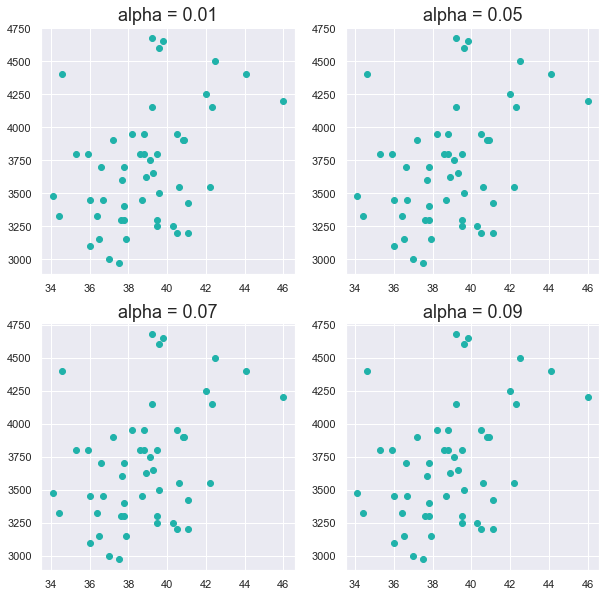

In [33]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

# Reference
http://www.stat.yale.edu/Courses/1997-98/101/linreg.html

Linear regression,https://en.wikipedia.org/wiki/Linear_regression    

ML | Linear Regression,https://www.geeksforgeeks.org/ml-linear-regression/

A Single Neuron,https://www.kaggle.com/code/ryanholbrook/a-single-neuron/tutorial